## 의사결정트리는 회귀, 분류에 모두 이용가능

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

데이터를 불러와, 입력-출력 구분

In [2]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

train_test_split 메서드로 데이터 나누고 test_size 특정.

In [6]:
def testTreeModel(TestSize):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y, 
                                                    stratify=cancer.target, 
                                                    test_size = TestSize,
                                                    random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [7]:
# 7:3, 8:2, 9:1, 6:4, 5:5
# AutoML
testTreeModel(0.5)  # 5:5
testTreeModel(0.4)  # 6:4
testTreeModel(0.3)  # 7:3
testTreeModel(0.2)  # 8:2
testTreeModel(0.1)  # 9:1

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.933
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.921
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


### 실습 1
- max_depth를 이용하여 과적합을 해소시켜보자. DecisionTreeClassifier(maxdepth, randomstate)
- (추가) max_leaf_nodes, min_sample_leaf를 추가해서 최적의 모델을 만들어보자.

In [24]:
def testTreeModel(TestSize, treeDepth):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y, 
                                                    stratify=cancer.target, 
                                                    test_size = TestSize,
                                                    random_state=77)
    
    tree = DecisionTreeClassifier(max_depth=treeDepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))
    
    a = tree.score(X_train, y_train)
    b = tree.score(X_test, y_test)
    return a, b

In [29]:
# 확인해보기
TestSize = [0.3, 0.4, 0.5]
treeDepth = [3,4,5]

score_train = 0
score_test = 0

trscore=[]
tscore=[]

for size in TestSize:
    for depth in treeDepth:
        global trscore
        global tscore
        
        s1, s2 = testTreeModel(size, depth)
        print("TestSize, treeDepth: ", size, depth)
        print("")
        
        trscore.append(s1)
        tscore.append(s2)
        
print(trscore)
print(tscore)
        
        

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
TestSize, treeDepth:  0.3 3

훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
TestSize, treeDepth:  0.3 4

훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
TestSize, treeDepth:  0.3 5

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.925
TestSize, treeDepth:  0.4 3

훈련 세트 정확도 : 0.994
테스트 세트 정확도 : 0.939
TestSize, treeDepth:  0.4 4

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.921
TestSize, treeDepth:  0.4 5

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.923
TestSize, treeDepth:  0.5 3

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.933
TestSize, treeDepth:  0.5 4

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.933
TestSize, treeDepth:  0.5 5

[0.9824120603015075, 0.9849246231155779, 0.992462311557789, 0.9824046920821115, 0.9941348973607038, 1.0, 0.9823943661971831, 1.0, 1.0]
[0.9064327485380117, 0.9064327485380117, 0.8888888888888888, 0.9254385964912281, 0.9385964912280702, 0.9210526315789473, 0.9228070175438596, 0.9333333333333333, 0.9333333333333333]


## Random Forest

In [30]:
import pandas as pd

train = pd.read_csv("data/house_train.csv")
test = pd.read_csv("data/house_test.csv")

In [32]:
print(train.columns)
print(test.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

In [35]:
# test dataset에는 price feature가 없다.
# 아~ price를 예측해야되는구나~~
# 결측치는 없다.

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# test set에는 price가 없으니까 일단 price 열을 drop 하자.
X_all = train.drop(['price'], axis=1)
y=train['price']

In [40]:
# Min_Max_Scaler 메서드로 Normalization 하기
from sklearn.preprocessing import MinMaxScaler

In [41]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
# sqft_living : 주거 공간의 평방피트(ft^2)
# sqft_lot : 부지의 평방피트
# bedrooms : 침실의 수

sel = ['sqft_living', 'sqft_lot', 'bedrooms']

X = X_all[sel]
y = train['price']

nor_X = MinMaxScaler().fit_transform(X)
nor_X[0:5]

array([[0.06716981, 0.00310751, 0.3       ],
       [0.03622642, 0.00574253, 0.2       ],
       [0.10490566, 0.00457949, 0.3       ],
       [0.10754717, 0.00381564, 0.3       ],
       [0.05811321, 0.00556747, 0.3       ]])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, random_state=42)

In [46]:
model = RandomForestRegressor(n_estimators=5, random_state=2) # 5개의 트리
print(model.fit(X_train, y_train))

# 결과 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

RandomForestRegressor(n_estimators=5, random_state=2)
0.8922137121180739
0.37937640288308927


In [47]:
model

RandomForestRegressor(n_estimators=5, random_state=2)

In [48]:
print(model.estimators_)

[DecisionTreeRegressor(max_features='auto', random_state=1872583848), DecisionTreeRegressor(max_features='auto', random_state=794921487), DecisionTreeRegressor(max_features='auto', random_state=111352301), DecisionTreeRegressor(max_features='auto', random_state=1853453896), DecisionTreeRegressor(max_features='auto', random_state=213298710)]


In [49]:
model.n_features_

3

In [51]:
X.shape

(15035, 3)

In [52]:
n_features = X.shape[1]
n_features

3

In [53]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

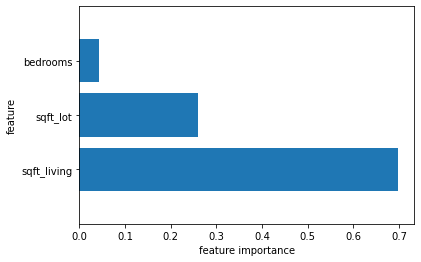

In [55]:
feature_names = sel # 선택한 특성 이름

plot_feature_important_up(model, n_features, feature_names)

### 실습 3-3
- 모델을 10개, 모델을 100개, 모델을 1000개 만들어서 score를 확인해 보기
- 학습용 및 테스트용의  score 결정계수이다.

In [59]:
n_model=[10,100,1000]

for n in n_model:
    start=time()
    model = RandomForestRegressor(n_estimators=n, random_state=2) # 5개의 트리
    print(model.fit(X_train, y_train))

    # 결과 확인
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print(time()-start)
    print("")

RandomForestRegressor(n_estimators=10, random_state=2)
훈련 세트 정확도 : 0.912
훈련 세트 정확도 : 0.408

RandomForestRegressor(random_state=2)
훈련 세트 정확도 : 0.934
훈련 세트 정확도 : 0.451

RandomForestRegressor(n_estimators=1000, random_state=2)
훈련 세트 정확도 : 0.936
훈련 세트 정확도 : 0.456



### 제출

In [90]:
model = RandomForestRegressor(n_estimators=100, random_state=2) # 5개의 트리
print(model.fit(X_train, y_train))

# 결과 확인
print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("훈련 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
print("")

RandomForestRegressor(random_state=2)
훈련 세트 정확도 : 0.934
훈련 세트 정확도 : 0.451



In [91]:
pred = model.predict(X_test)
len(pred)

3759

In [93]:
pred[0:5]

array([394136. , 370761.5, 339024.5, 225658.5, 427717.5])

In [92]:
# Submission
sub = pd.read_csv("data/sample_submission.csv")
len(sub)

6468

In [94]:
sub['price'] = pred
sub.to_csv("firstsub.csv", index=False)

ValueError: Length of values does not match length of index

### 실습 3-4 score 개선하기

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [109]:
# test set에는 price가 없으니까 일단 price 열을 drop 하자.
X_all = train.drop(['price'], axis=1)
y=train['price']

# Min_Max_Scaler 메서드로 Normalization 하기
from sklearn.preprocessing import MinMaxScaler

# sqft_living : 주거 공간의 평방피트(ft^2)
# sqft_lot : 부지의 평방피트
# bedrooms : 침실의 수

sel = ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built']

X = X_all[sel]
y = train['price']

# MinMaxScaler 메서드로 data 정규화
nor_X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(nor_X, y, random_state=42)

model = RandomForestRegressor(n_estimators=1000, random_state=2) # 5개의 트리
print(model.fit(X_train, y_train))

# 결과 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

RandomForestRegressor(n_estimators=1000, random_state=2)
0.9621056909621075
0.6884841187051769


### Feature의 중요도

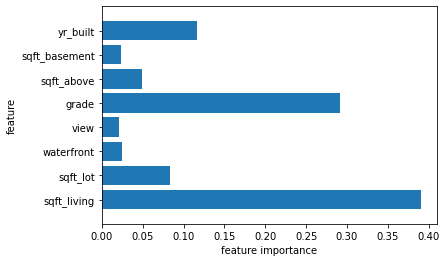

In [110]:
n_features = X.shape[1]

# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 
    
feature_names = sel # 선택한 특성 이름

plot_feature_important_up(model, n_features, feature_names)

In [ ]:
'''
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
    RandomForestRegressor(n_estimators=500, random_state=2)
    0.9630963962401365
    0.697858726255958
    
    
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built']
    RandomForestRegressor(n_estimators=1000, random_state=2)
    0.9629373024868187
    0.6953513390170254
    


'''

- 의사결정트리는 MinMaxScaler에 영향을 받지 않는다.
- n_estimators는 클수록 좋다.
- feature_importance가 작은 것은 빼주는게 좋다.

### 그래디언트 부스팅 기법

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [119]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
# ============
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_importances_cancer(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

# 데이터 확인
print(cancer.keys())
print(cancer.target_names)      # 목적변수(종속변수)      
print(cancer.target) 
print(cancer.feature_names)
print(cancer.data.shape)        # 569행 , 30열
print(cancer.data)              # 설명변수(독립변수)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 

In [131]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 생성, 학습, 예측 및 평가(model.score)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


### (Exercise 4-1) 트리의 학습률(learning_rate) modulate
- modulate 0.1 to 0.01

In [132]:
'''
lr_late = [0.01, 0.05, 0.07, 0.09, 0.001, 0.005, 0.007]
max_depth = range(2, 7, 1) # 2, 3,4,5,6,

for i in lr_late:
    for depth in max_depth:
        gbrt = GradientBoostingClassifier(random_state=0, 
                                          learning_rate=i, 
                                          max_depth = depth)
        gbrt.fit(X_train, y_train)

        print("학습률 : {}, 트리 깊이: {}".format(i, depth))
        print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
        print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
        print()
'''        
gbrt = GradientBoostingClassifier(random_state=0, 
                                          learning_rate=2, 
                                          max_depth =0.09)
gbrt.fit(X_train, y_train)

print("학습률 : {}, 트리 깊이: {}".format(2, 0.09))
print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
print()  

학습률 : 2, 트리 깊이: 0.09
학습 데이터 세트 정확도: 0.627
테스트 세트 정확도: 0.629



In [133]:
# =======================
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 


30


C:\Users\BCBL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BCBL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


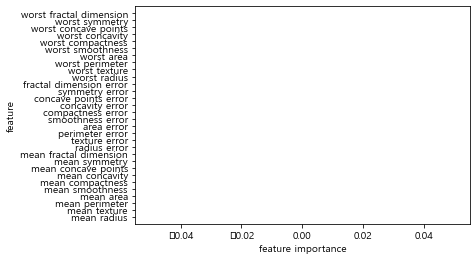

In [134]:
# ================
print(X_train.shape[1])
num = X_train.shape[1]
name = cancer.feature_names
# ============================
plot_feature_important_up(gbrt, num, name)

### 상관계수 확인하기

In [135]:
train=pd.read_csv("data/house_train.csv")
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873
